<a href="https://colab.research.google.com/github/sabiretutardemir/100-Day-ML-Codes-Challenge/blob/main/Day2__Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random #to data creation

In [ ]:
data=[]
for _ in range(1000):
  team_name= f"Team {chr(random.randint(75,95))}"
  seoson= random.randint(2010,2024)
  wins= random.randint(50,110)
  losses= 172-wins
  hits= random.randint(1200,1600)
  doubles = random.randint(200,350)
  triples = random.randint(10,40)
  home_runs= random.randint(100,250)
  strikeouts = random.randint(1000,1700)

  hits_adjusted=hits + (wins-80)*5
  doubles_adjusted= doubles + (wins-80)* 3
  triples_adjusted= triples + (wins-80)
  home_runs_adjusted= home_runs + (wins-80)*3
  strikeouts_adjusted= strikeouts - (wins-80)*10

  data.append([team_name,seoson,wins,losses,hits_adjusted,doubles_adjusted,triples_adjusted,home_runs_adjusted,strikeouts_adjusted])


In [ ]:
type(data)

list

In [ ]:
columns=["Team","Seoson","Wins","Losses", "Hits", "Doubles","Triples","HomeRuns","Strikeouts"]
df= pd.DataFrame(data,columns=columns)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,Team,Seoson,Wins,Losses,Hits,Doubles,Triples,HomeRuns,Strikeouts
0,Team Z,2017,87,85,1504,222,17,205,1511
1,Team L,2010,88,84,1415,261,28,205,1407
2,Team X,2023,70,102,1176,251,16,108,963
3,Team M,2018,79,93,1373,298,27,185,1643
4,Team _,2018,58,114,1265,168,-4,65,804


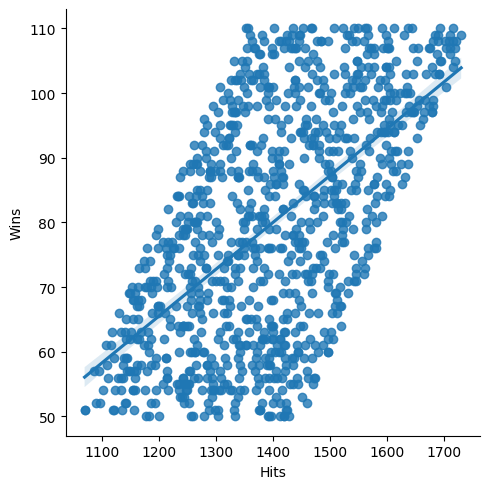

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="Hits", y="Wins", data=df)
plt.show()

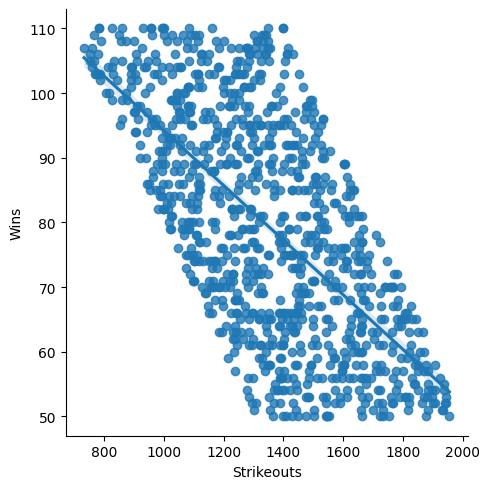

In [ ]:
sns.lmplot(x="Strikeouts", y="Wins", data=df)
plt.show()
#there is negative relationship between strikeouts and wins

In [ ]:
df2=df.drop(columns=["Team", "Seoson","Losses"], axis=1)
df2.head()

,Wins,Hits,Doubles,Triples,HomeRuns,Strikeouts
0,52,1221,254,-2,89,1588
1,57,1088,236,-7,92,1595
2,84,1228,232,23,113,993
3,84,1565,310,15,258,985
4,85,1624,254,44,219,1389


In [ ]:
df2.columns

Index(['Wins', 'Hits', 'Doubles', 'Triples', 'HomeRuns', 'Strikeouts'], dtype='object')

In [ ]:
X= df2.iloc[:,1:]

In [ ]:
y= df2.iloc[:,0] #wins

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #data is split the same way every time you run the code

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_test, y_test)

0.8735776247501459

In [ ]:
lr.score(X_train, y_train)

0.8888311563050157

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
mean_absolute_error(y_test,y_pred)

4.805044981136008

In [ ]:
mean_squared_error(y_test,y_pred)

36.18485244652623

In [ ]:
r2_score(y_test, y_pred)

0.8735776247501459

In [ ]:
lr.coef_

array([ 0.01234076,  0.05887026,  0.39772555,  0.05084002, -0.00866931])

In [ ]:
lr.intercept_

39.411112292107596

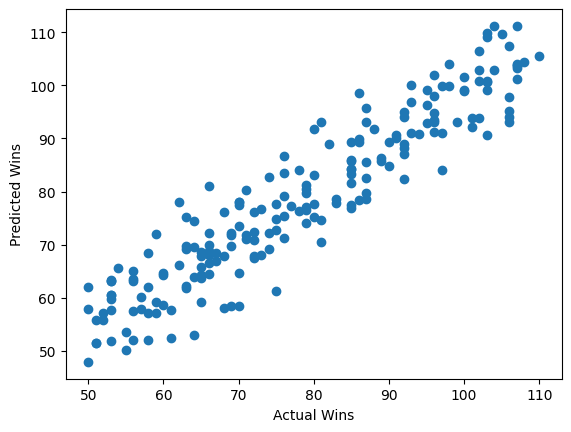

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.show()